Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [491]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
%matplotlib inline

In [492]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## EDA

In [493]:
df.rename({'Unnamed: 0': 'State'}, inplace=True)
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [494]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [495]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

<AxesSubplot:>

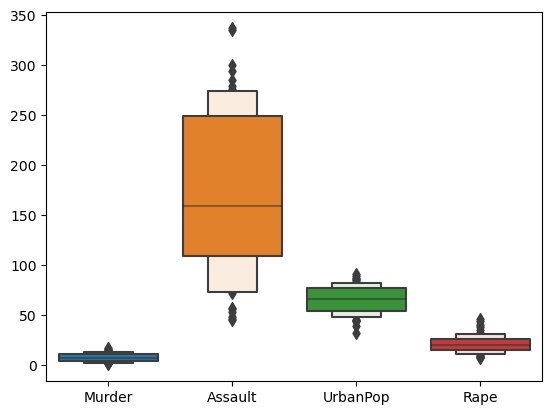

In [496]:
sns.boxenplot(df)

## Standardization

In [497]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## Hierarchical Clustering

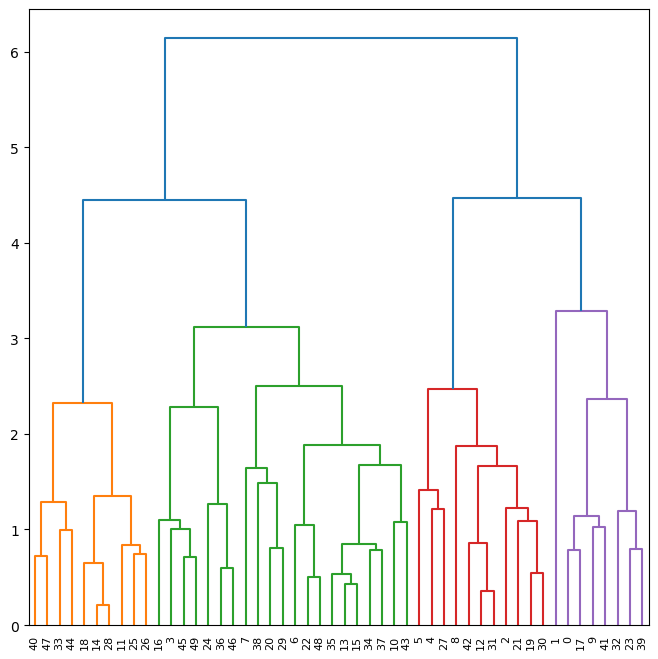

In [498]:
from scipy.cluster import hierarchy
plt.figure(figsize=(8, 8))
lk = hierarchy.linkage(x, method='complete')
dendrograms = hierarchy.dendrogram(lk)

## Model Building

In [499]:
ac = AgglomerativeClustering(n_clusters=4, linkage='complete')
clusters = ac.fit_predict(x)
df['Clusters'] = clusters

In [500]:
df.groupby('Clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [501]:
from sklearn.metrics import silhouette_score
silhouette_score(x, clusters)

0.31595507426164543

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

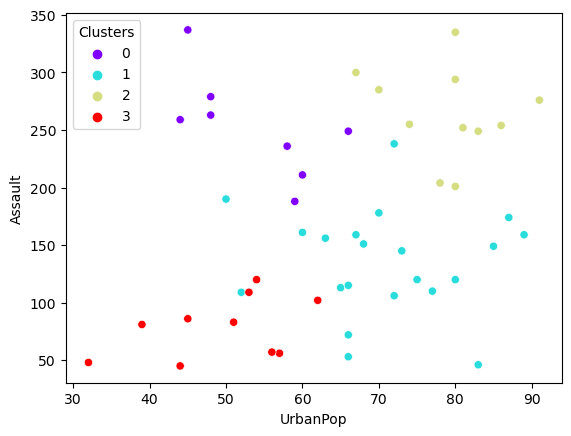

In [502]:
sns.scatterplot(x=df['UrbanPop'], y=df['Assault'], hue=df['Clusters'], palette='rainbow')

## KMeans Clustering

In [503]:
df.drop(columns='Clusters', inplace=True)

In [504]:
km = KMeans()
clusters = km.fit_predict(x)
df['Clusters'] = clusters

In [505]:
km.inertia_

36.47553698821615

In [506]:
silhouette_score(x, clusters)

0.24230978190518612

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

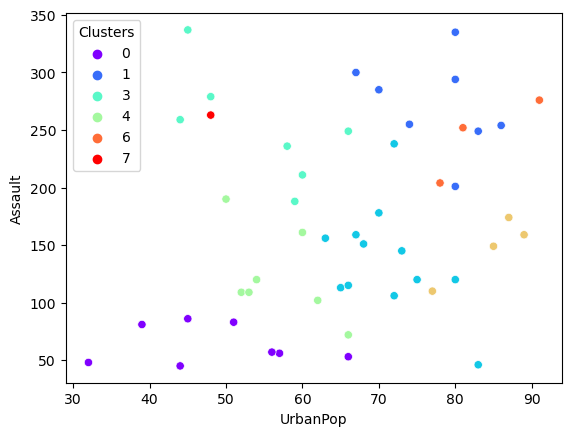

In [507]:
sns.scatterplot(x=df['UrbanPop'], y=df['Assault'], hue=df['Clusters'], palette='rainbow')

## Elbow graph

In [508]:
wcss = []

for i in range(1, 21):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit_predict(x)
    wcss.append(km.inertia_)

wcss

C:\Users\rasam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 49.96920284452793,
 45.23604904577288,
 40.99965950480165,
 35.57097007545426,
 32.65195608327404,
 28.51862602697858,
 25.169263145982406,
 22.690129503857587,
 20.257523101170626,
 19.00713525202359,
 17.732351272556812,
 17.215481220426174,
 15.928762560822728,
 15.282774827763557,
 13.81497559431487,
 13.455535742431886]

<AxesSubplot:>

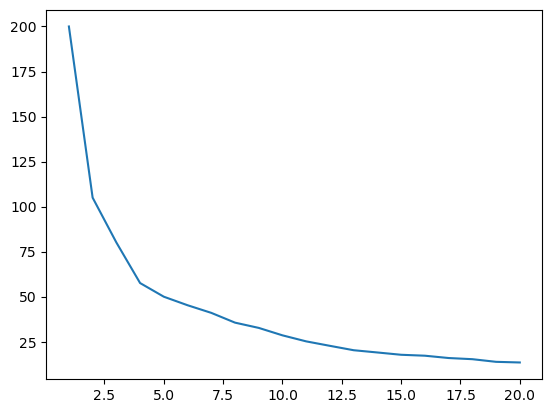

In [509]:
sns.lineplot(x=range(1, 21), y=wcss)

## Final Model

In [510]:
final_km = KMeans(n_clusters=4, random_state=1)
clusters = final_km.fit_predict(x)
df['Clusters'] = clusters

In [511]:
df.groupby('Clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,10.815385,257.384615,76.000000,33.192308
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,5.656250,138.875000,73.875000,18.781250


In [512]:
silhouette_score(x, clusters)

0.33968891433344395

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

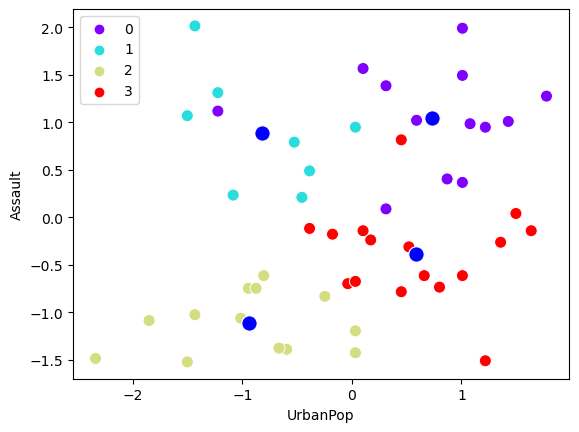

In [513]:
sns.scatterplot(x=x['UrbanPop'], y=x['Assault'], hue=df['Clusters'], palette='rainbow', s=75)
sns.scatterplot(x=final_km.cluster_centers_[:, 2], y=final_km.cluster_centers_[:, 1], c='blue', s=125)

## DBSCAN

In [514]:
db = DBSCAN(eps=1.15, min_samples=4)
clusters = db.fit_predict(x)
df['Clusters'] = clusters

In [515]:
df.groupby('Clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
-1,10.066667,261.333333,75.000000,36.250000
0,14.671429,251.285714,54.285714,21.685714
1,11.014286,262.571429,77.142857,28.800000
2,4.973333,112.433333,63.566667,16.356667


In [516]:
silhouette_score(x, clusters)

0.28523184583363054

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

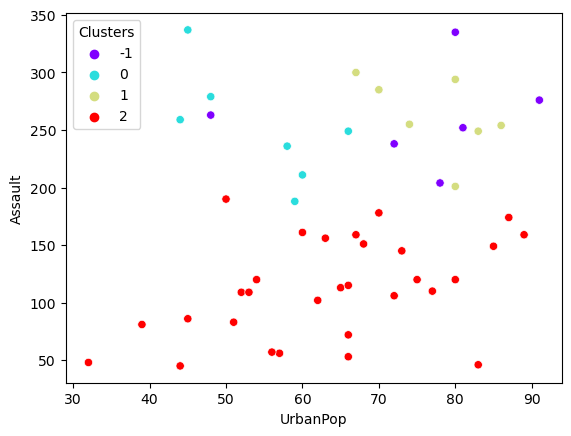

In [517]:
sns.scatterplot(x=df['UrbanPop'], y=df['Assault'], hue=df['Clusters'], palette='rainbow')